In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy import displacy
import json
import pickle
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random
import seaborn as sns
import pandas as pd

In [2]:
lemmatised_words=[]
tokenised_words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('/content/drive/MyDrive/chat bot/intents.json').read()
intents = json.loads(data_file)

In [3]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        #tokenize and lemmatizing each word
        w1 = nlp(pattern)
        tokenised_words = tokenised_words + [str(x) for x in w1]
        lemmatised_words = lemmatised_words + [str(x.lemma_) for x in w1]
          
        #add documents in the corpus
        documents.append(([str(x) for x in w1],intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag']) 


In [4]:
print(tokenised_words)
print(lemmatised_words)

['Hi', 'there', 'How', 'are', 'you', 'Is', 'anyone', 'there', '?', 'Hey', 'Hola', 'Hello', 'Good', 'day', 'Bye', 'See', 'you', 'later', 'Goodbye', 'Nice', 'chatting', 'to', 'you', ',', 'bye', 'Till', 'next', 'time', 'Thanks', 'Thank', 'you', 'That', "'s", 'helpful', 'Awesome', ',', 'thanks', 'Thanks', 'for', 'helping', 'me', 'How', 'you', 'could', 'help', 'me', '?', 'What', 'you', 'can', 'do', '?', 'What', 'help', 'you', 'provide', '?', 'How', 'you', 'can', 'be', 'helpful', '?', 'What', 'support', 'is', 'offered', 'How', 'to', 'check', 'Adverse', 'drug', 'reaction', '?', 'Open', 'adverse', 'drugs', 'module', 'Give', 'me', 'a', 'list', 'of', 'drugs', 'causing', 'adverse', 'behavior', 'List', 'all', 'drugs', 'suitable', 'for', 'patient', 'with', 'adverse', 'reaction', 'Which', 'drugs', 'do', 'nt', 'have', 'adverse', 'reaction', '?', 'Open', 'blood', 'pressure', 'module', 'Task', 'related', 'to', 'blood', 'pressure', 'Blood', 'pressure', 'data', 'entry', 'I', 'want', 'to', 'log', 'blood',

In [5]:
lemmatised_words = sorted(list(set(lemmatised_words)))
tokenised_words  = sorted(list(set(tokenised_words)))
tokenised_words.remove('?')
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(tokenised_words), "unique words", tokenised_words)

47 documents
9 classes ['adverse_drug', 'blood_pressure', 'blood_pressure_search', 'goodbye', 'greeting', 'hospital_search', 'options', 'pharmacy_search', 'thanks']
100 unique words ["'s", ',', 'Adverse', 'Awesome', 'Blood', 'Bye', 'Find', 'Give', 'Good', 'Goodbye', 'Hello', 'Hey', 'Hi', 'Hola', 'Hospital', 'How', 'I', 'ID', 'Is', 'List', 'Load', 'Locate', 'Looking', 'Lookup', 'Nice', 'Open', 'Search', 'Searching', 'See', 'Show', 'Task', 'Thank', 'Thanks', 'That', 'Till', 'What', 'Which', 'a', 'adverse', 'all', 'anyone', 'are', 'be', 'behavior', 'blood', 'by', 'bye', 'can', 'causing', 'chatting', 'check', 'could', 'data', 'day', 'details', 'do', 'drug', 'drugs', 'entry', 'for', 'have', 'help', 'helpful', 'helping', 'history', 'hospital', 'is', 'later', 'list', 'log', 'lookup', 'management', 'me', 'module', 'nearby', 'next', 'nt', 'of', 'offered', 'patient', 'pharmacies', 'pharmacy', 'pressure', 'provide', 'reaction', 'related', 'result', 'results', 'search', 'suitable', 'support', 'tha

**Visualization of the data** 

In [6]:
full_string = " "
for x in tokenised_words:
  full_string =full_string+ x + " "
l1 = nlp(full_string)
l2=[]
for token in l1:
  l2.append(token.pos_)
df = pd.DataFrame(data = l2,columns=['parts of speech'])
df.head(10)


,parts of speech
0,SPACE
1,PART
2,PUNCT
3,PROPN
4,PROPN
5,NOUN
6,NOUN
7,VERB
8,VERB
9,ADJ


[Text(0, 0, 'SPACE'),
 Text(0, 0, 'PART'),
 Text(0, 0, 'PUNCT'),
 Text(0, 0, 'PROPN'),
 Text(0, 0, 'NOUN'),
 Text(0, 0, 'VERB'),
 Text(0, 0, 'ADJ'),
 Text(0, 0, 'INTJ'),
 Text(0, 0, 'ADV'),
 Text(0, 0, 'PRON'),
 Text(0, 0, 'AUX'),
 Text(0, 0, 'SCONJ'),
 Text(0, 0, 'DET'),
 Text(0, 0, 'ADP')]

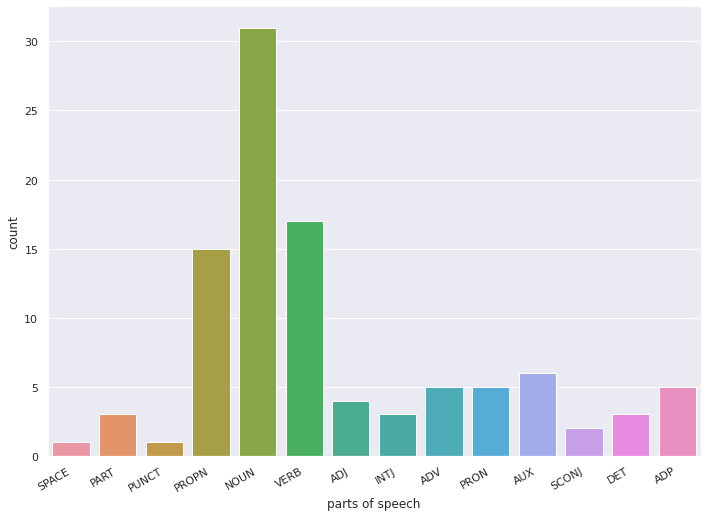

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.countplot(x="parts of speech", data=df)
fig.set_xticklabels(fig.get_xticklabels(), rotation=30, ha="right")


In [8]:
data = pd.json_normalize(data=intents['intents'])
data.head(6)

,tag,patterns,responses,context
0,greeting,"[Hi there, How are you, Is anyone there?, Hey,...","[Hello, thanks for asking, Good to see you aga...",[]
1,goodbye,"[Bye, See you later, Goodbye, Nice chatting to...","[See you!, Have a nice day, Bye! Come back aga...",[]
2,thanks,"[Thanks, Thank you, That's helpful, Awesome, t...","[Happy to help!, Any time!, My pleasure]",[]
3,noanswer,[],"[Sorry, can't understand you, Please give me m...",[]
4,options,"[How you could help me?, What you can do?, Wha...",[I can guide you through Adverse drug reaction...,[]
5,adverse_drug,"[How to check Adverse drug reaction?, Open adv...",[Navigating to Adverse drug reaction module],[]


In [9]:
spacy_stopwords = nlp.Defaults.stop_words
with open("/content/drive/MyDrive/chat bot/more stopwords.txt") as file:
    more_stopwords = {line.rstrip() for line in file}
final_stopwords = spacy_stopwords | more_stopwords

In [10]:

import matplotlib.pyplot as plt
import wordcloud
#Instantiate the wordcloud object
wc = wordcloud.WordCloud(background_color='white', max_words=300, stopwords=final_stopwords, collocations=False, max_font_size=40, random_state=42)

In [11]:
word_list =[]
for i in range(0,data.shape[0]):
    word_list = word_list + data.iloc[i].patterns
for i in range(0,data.shape[0]):
    word_list = word_list + data.iloc[i].responses
for i in range(0,data.shape[0]):
    word_list = word_list + [data.iloc[i].tag]
print(word_list)

['Hi there', 'How are you', 'Is anyone there?', 'Hey', 'Hola', 'Hello', 'Good day', 'Bye', 'See you later', 'Goodbye', 'Nice chatting to you, bye', 'Till next time', 'Thanks', 'Thank you', "That's helpful", 'Awesome, thanks', 'Thanks for helping me', 'How you could help me?', 'What you can do?', 'What help you provide?', 'How you can be helpful?', 'What support is offered', 'How to check Adverse drug reaction?', 'Open adverse drugs module', 'Give me a list of drugs causing adverse behavior', 'List all drugs suitable for patient with adverse reaction', 'Which drugs dont have adverse reaction?', 'Open blood pressure module', 'Task related to blood pressure', 'Blood pressure data entry', 'I want to log blood pressure results', 'Blood pressure data management', 'I want to search for blood pressure result history', 'Blood pressure for patient', 'Load patient blood pressure result', 'Show blood pressure results for patient', 'Find blood pressure results by ID', 'Find me a pharmacy', 'Find ph

In [12]:
# Generate word cloud
wc=wc.generate(" ".join(word_list).lower())

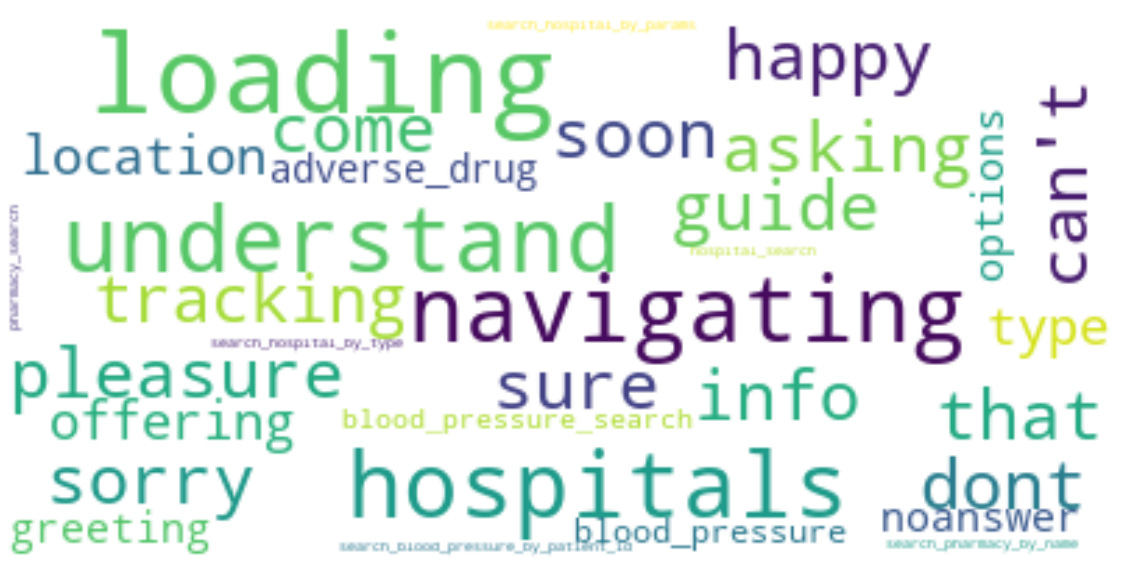

In [13]:
# Show word cloud
plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
pickle.dump(tokenised_words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))


In [15]:
# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence

for doc in documents:
    # initialize our bag of words
    bag = []
    # list of lemmatised words for the pattern
    pattern_words = []
    for y in doc[0] :
      pattern_words = pattern_words + [str(x.lemma_) for x in nlp(y)]
    for w in tokenised_words:
        bag.append(1) if w in pattern_words else bag.append(0)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])


In [16]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

In [18]:
# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [19]:
#fitting and saving the model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)

print("model created")

Epoch 1/200
10/10 [==============================] - 1s 3ms/step - loss: 2.1962 - accuracy: 0.0426
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 2.1745 - accuracy: 0.1489
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 2.0441 - accuracy: 0.2766
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 1.9849 - accuracy: 0.2979
Epoch 5/200
10/10 [==============================] - 0s 2ms/step - loss: 1.9486 - accuracy: 0.4043
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 1.8592 - accuracy: 0.4255
Epoch 7/200
10/10 [==============================] - 0s 2ms/step - loss: 1.7248 - accuracy: 0.4468
Epoch 8/200
10/10 [==============================] - 0s 3ms/step - loss: 1.5610 - accuracy: 0.5745
Epoch 9/200
10/10 [==============================] - 0s 2ms/step - loss: 1.4615 - accuracy: 0.5957
Epoch 10/200
10/10 [==============================] - 0s 3ms/step - loss: 1.3696 - accuracy: 0.5319
Epoch 11/

In [20]:
intentsnew = json.loads(open('/content/drive/MyDrive/chat bot/intents.json').read())
wordsnew = tokenised_words #pickle.load(open('/content/drive/MyDrive/chat bot/words.pkl','rb'))
classesnew = pickle.load(open('/content/drive/MyDrive/chat bot/classes.pkl','rb'))
from tensorflow.keras.models import load_model
model = load_model('chatbot_model.h5')

In [21]:
def clean_up_sentence(sentence):
    lst = nlp(sentence)
    # stem each word - create short form for word
    sentence_words = [str(x.lemma_) for x in lst]
    return sentence_words

In [22]:
def bow(sentence,wordsnew, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(wordsnew)  
    for s in sentence_words:
        for i,w in enumerate(wordsnew):
            if w == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

In [23]:
def predict_class(sentence, model):
    # filter out predictions below a threshold
    p = bow(sentence, wordsnew,show_details=False)
    print(np.array([p]))
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classesnew[r[0]], "probability": str(r[1])})
    return return_list

In [24]:
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

In [25]:
def chatbot_response(msg):
    ints = predict_class(msg, model)
    res = getResponse(ints, intentsnew)
    return res


In [31]:
chatbot_response('what can you do for me')

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


'Offering support for Adverse drug reaction, Blood pressure, Hospitals and Pharmacies'

# New Section